In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

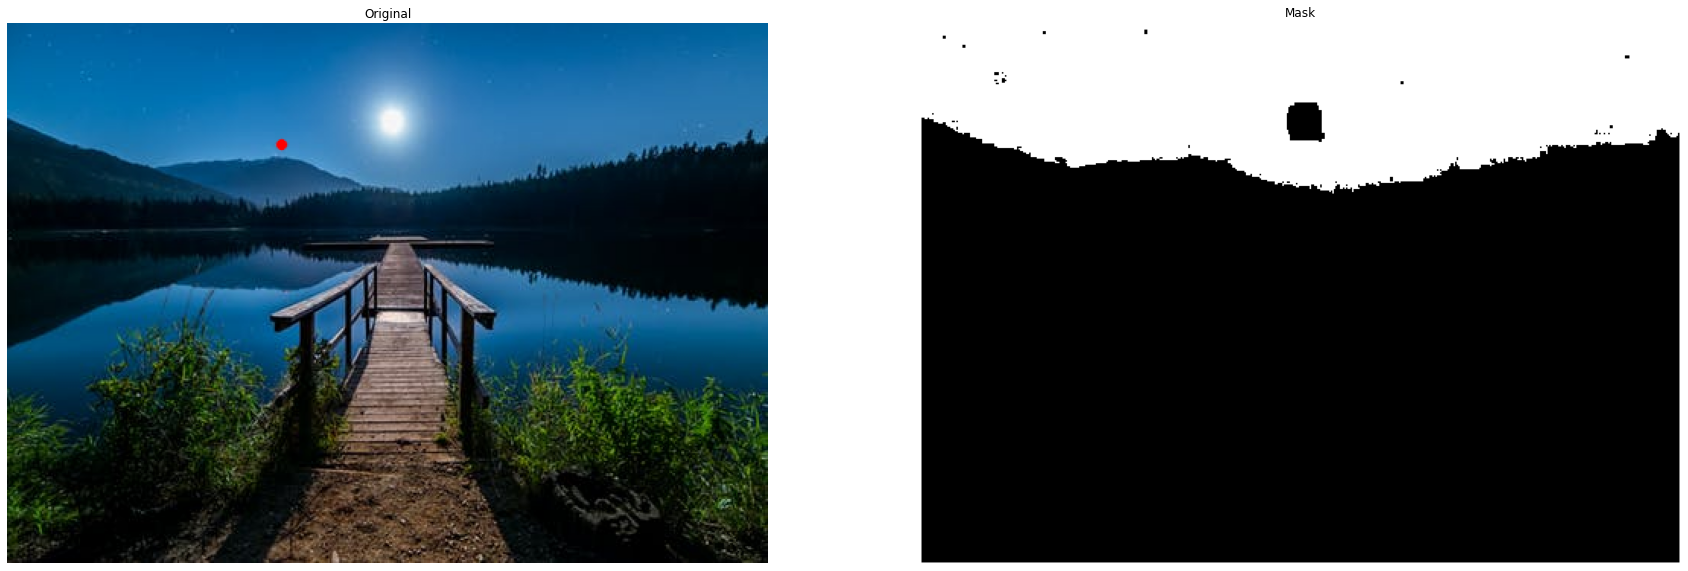

In [2]:
src = cv2.imread('./data/bridge.jpg')
srcrgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
mask = np.zeros((src.shape[0]+2, src.shape[1]+2), np.uint8)

seed = (180, 80) # 이 점을 중심으로 growing
newVal = 255
loDiff, upDiff = (5, 5 ,5), (5, 5, 5)

#floodflags = 4
#floodflags |= cv2.FLOODFILL_MASK_ONLY
#floodflags |= (255 << 8)
#cv2.floodFill(src, mask, seedPoint=seed, newVal=newVal, loDiff=loDiff, upDiff=upDiff, flags=floodflags)
cv2.floodFill(src, mask, seedPoint=seed, newVal=newVal, loDiff=loDiff, 
              upDiff=upDiff)
cv2.circle(srcrgb, seed, 3, (255, 0, 0), cv2.FILLED, cv2.LINE_AA);

plt.figure(figsize=(30, 30))
imgae1=plt.subplot(1, 2, 1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(srcrgb)

imgae1=plt.subplot(1, 2, 2)
imgae1.set_title('Mask')
plt.axis('off')
plt.imshow(mask, cmap='gray')

In [3]:
src2 = cv2.imread('./data/duck.png')
mask = np.zeros((src2.shape[0]+2, src2.shape[1]+2), np.uint8)

def onMouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        seed = (x,y)
        r = np.random.randint(256)
        g = np.random.randint(256)
        b = np.random.randint(256)
        newVal = (b, g, r)
        retval = cv2.floodFill(src2, mask, seed, newVal=newVal, loDiff=loDiff, upDiff=upDiff)
        cv2.imshow('src2', src2)
        
cv2.imshow('src2', src2)
cv2.setMouseCallback('src2', onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()